<a href="https://colab.research.google.com/github/Rishitha2805/Outbreak-Prediction-of-Covid-19-in-INDIA/blob/main/ML_Project_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.style.use('fivethirtyeight')
%matplotlib inline
# Manipulating the default plot size
# plt.rcParams['figure.figsize'] = 10, 12
 
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
df = pd.read_csv('/content/Covid_Cases_dataset.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed

,Date,Confirmed
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
174,2020-06-24,473105
175,2020-06-25,490401
176,2020-06-26,508953
177,2020-06-27,528859


In [ ]:
dates=list(confirmed['Date'])
len(dates)

179

In [ ]:
Y_confirmed=list(confirmed.iloc[:,-1].values)
Y_deaths=list(deaths.iloc[:,-1].values)
Y_recovered=list(recovered.iloc[:,-1].values)

In [ ]:
X=np.array([i for i in range(len(dates))]).reshape(-1,1)
Y_confirmed=np.array(Y_confirmed).reshape(-1,1)
Y_deaths=np.array(Y_deaths).reshape(-1,1)
Y_recovered=np.array(Y_recovered).reshape(-1,1)

In [ ]:
days_in_future=20
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-20]
# future_forecast

In [ ]:
# adjusted_dates

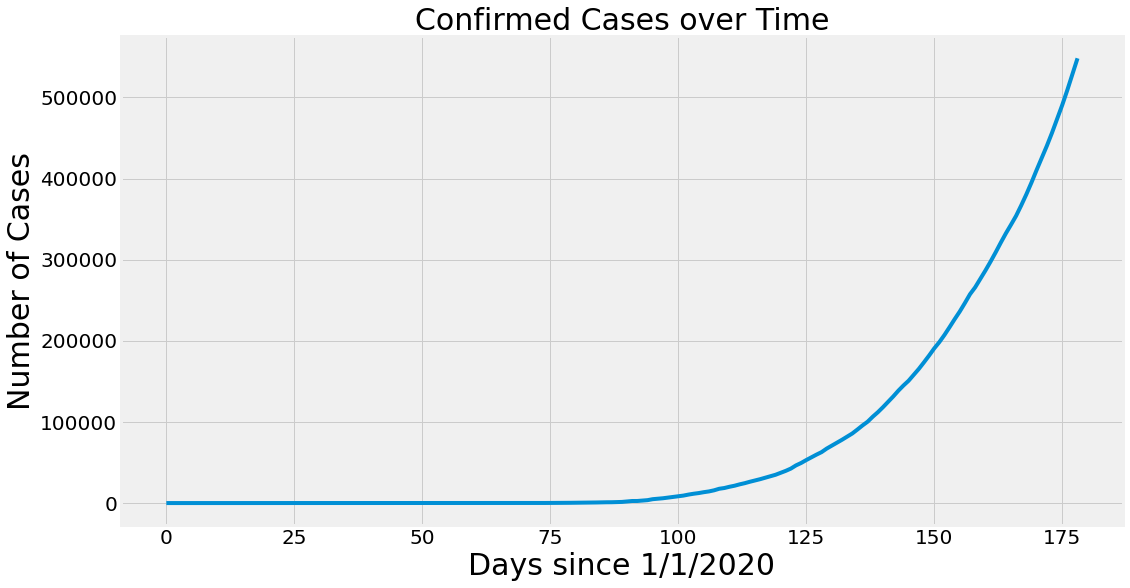

In [ ]:
adjusted_dates=adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_confirmed)
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

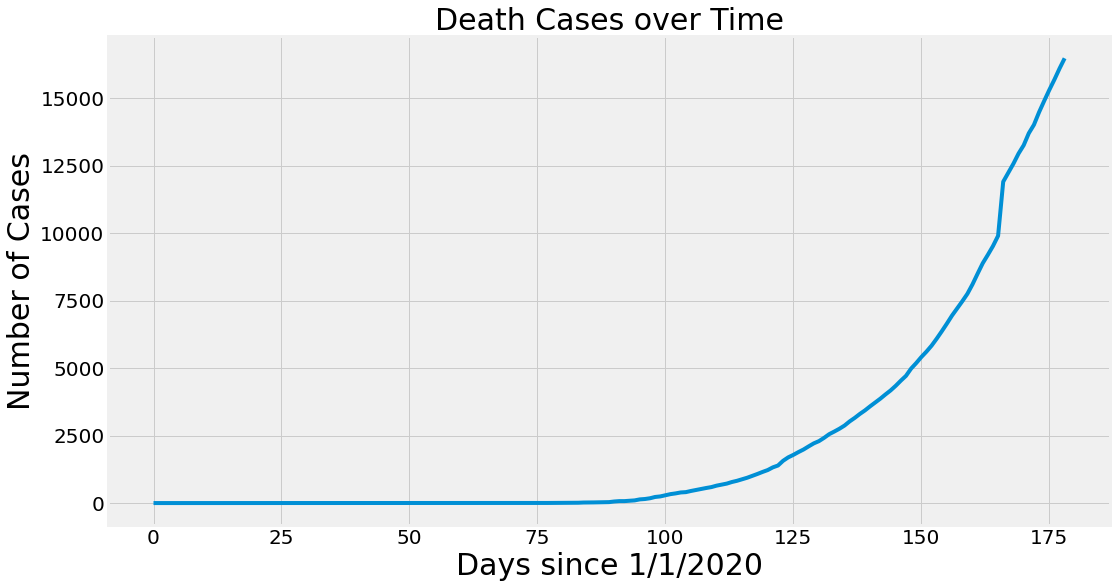

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.title('Death Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

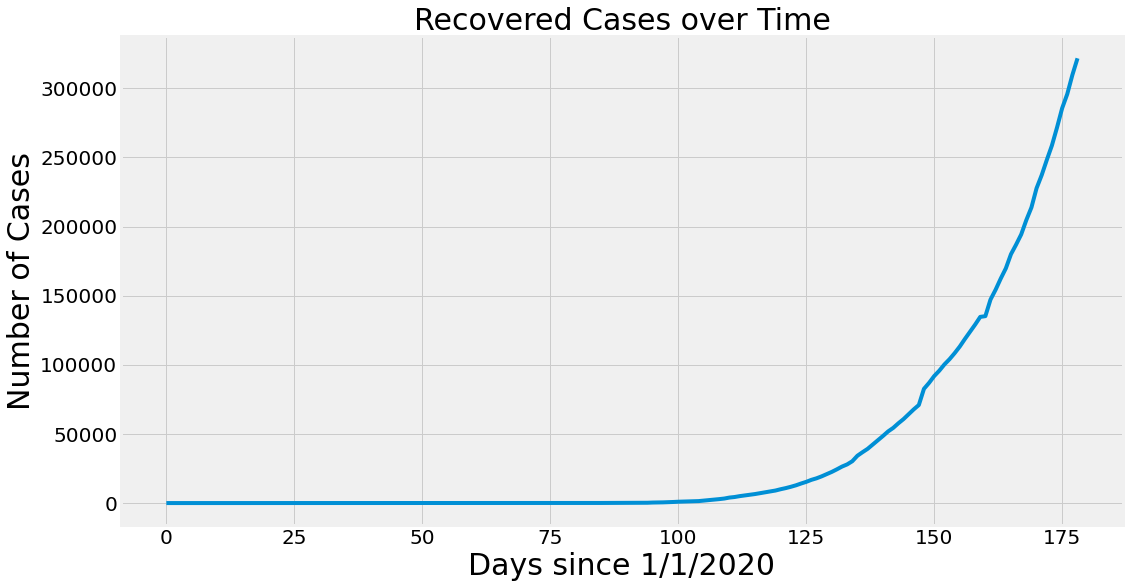

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.title('Recovered Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
# print(len(X),len(Y_confirmed))

In [ ]:
start='2020-01-01'
start_date=datetime.datetime.strptime(start,'%Y-%m-%d')
future_forecast_dates=[]
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%Y-%m-%d'))
# X[0] = pd.to_datetime(X[0], format='%Y-%m-%d')

In [ ]:
X_train_confirmed,X_test_confirmed,Y_train_confirmed,Y_test_confirmed=train_test_split(X,Y_confirmed,test_size=0.2,shuffle=False)

In [ ]:
nb_confirmed=GaussianNB()
nb_confirmed.fit(X_train_confirmed,Y_train_confirmed)
nb_pred=nb_confirmed.predict(future_forecast)

In [ ]:
nb_pred

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      1,      1,      1,
            1,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      5,      5,     28,     30,
           31,     34,     39,     43,     56,     62,     73,     82,
          102,    113,    119,    142,    156,    194,    244,    330,
          396,    499,    536,    657,    727,    887,    987,   1024,
         1251,   1397,   1998,   2543,   2567,   3082,   3588,   4778,
         5311,   5916,   6725,   7598,   8446,   9205,  10453,  11487,
        12322,  13430,  14352,  15722,  17615,  18539,  20080,  21370,
      

In [ ]:
nb_confirmed

GaussianNB(priors=None, var_smoothing=1e-09)

Root mean square error 330758.3219572025
Root mean absolute error 555.3517904095665


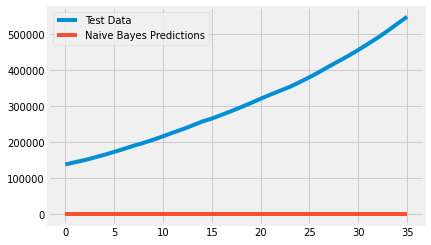

In [ ]:
nb_test_pred=nb_confirmed.predict(X_test_confirmed)
plt.plot(Y_test_confirmed)
plt.plot(nb_test_pred)
plt.legend(['Test Data','Naive Bayes Predictions'])
mse = math.sqrt(mean_squared_error(nb_test_pred, Y_test_confirmed)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(nb_test_pred, Y_test_confirmed)) 
print('Root mean absolute error', mae) 

In [ ]:
len(future_forecast_dates),len(nb_pred)

(199, 199)

In [ ]:
nb_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Naive Bayes Predicted # number of Confirmed cases in India':np.round(nb_pred[-20:])})
nb_df

,Date,Naive Bayes Predicted # number of Confirmed cases in India
0,2020-06-28,3
1,2020-06-29,3
2,2020-06-30,3
3,2020-07-01,3
4,2020-07-02,3
5,2020-07-03,3
6,2020-07-04,3
7,2020-07-05,3
8,2020-07-06,3
9,2020-07-07,3


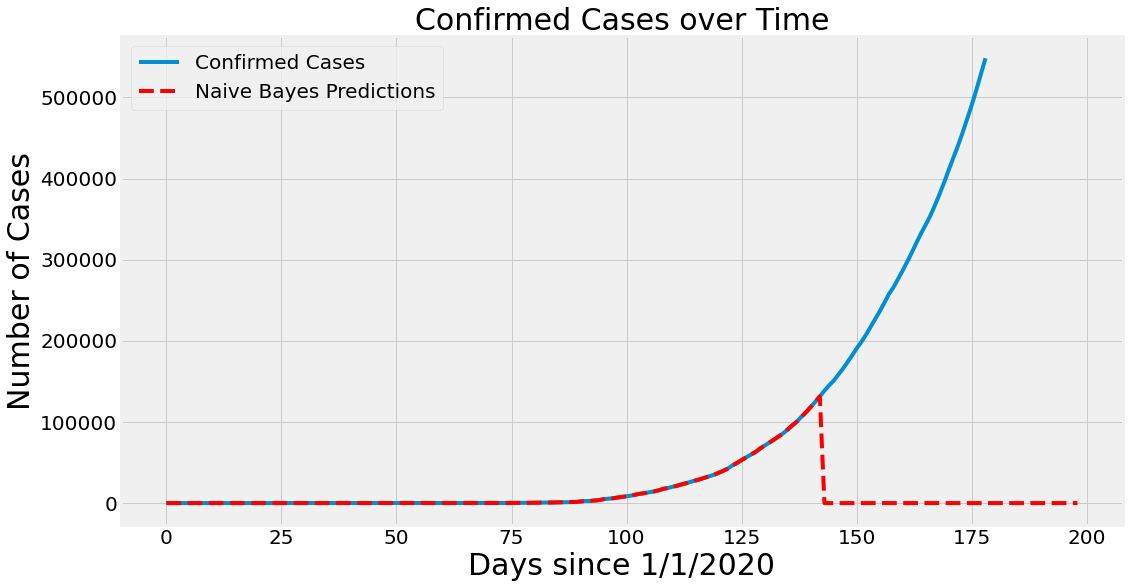

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_confirmed)
plt.plot(future_forecast,nb_pred,linestyle='dashed',color='red')
plt.title('Confirmed Cases over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','Naive Bayes Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# ***`DEATHS`***

In [ ]:
X_train_deaths,X_test_deaths,Y_train_deaths,Y_test_deaths=train_test_split(X,Y_deaths,test_size=0.2,shuffle=False)

In [ ]:
nb_deaths=GaussianNB()
nb_deaths.fit(X_train_deaths,Y_train_deaths)
nb_pred=nb_deaths.predict(future_forecast)

Root mean square error 10121.761897844994
Root mean absolute error 96.45393258499682


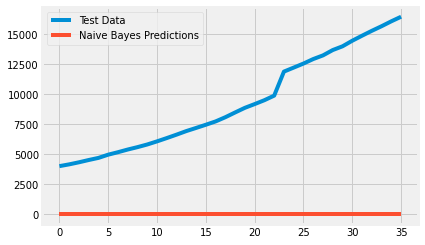

In [ ]:
nb_test_pred=nb_deaths.predict(X_test_deaths)
plt.plot(Y_test_deaths)
plt.plot(nb_test_pred)
plt.legend(['Test Data','Naive Bayes Predictions'])
mse = math.sqrt(mean_squared_error(nb_test_pred, Y_test_deaths)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(nb_test_pred, Y_test_deaths)) 
print('Root mean absolute error', mae) 

In [ ]:
nb_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Naive Bayes Predicted # number of Deaths in India':np.round(nb_pred[-20:])})
nb_df

,Date,Naive Bayes Predicted # number of Deaths in India
0,2020-06-28,0
1,2020-06-29,0
2,2020-06-30,0
3,2020-07-01,0
4,2020-07-02,0
5,2020-07-03,0
6,2020-07-04,0
7,2020-07-05,0
8,2020-07-06,0
9,2020-07-07,0


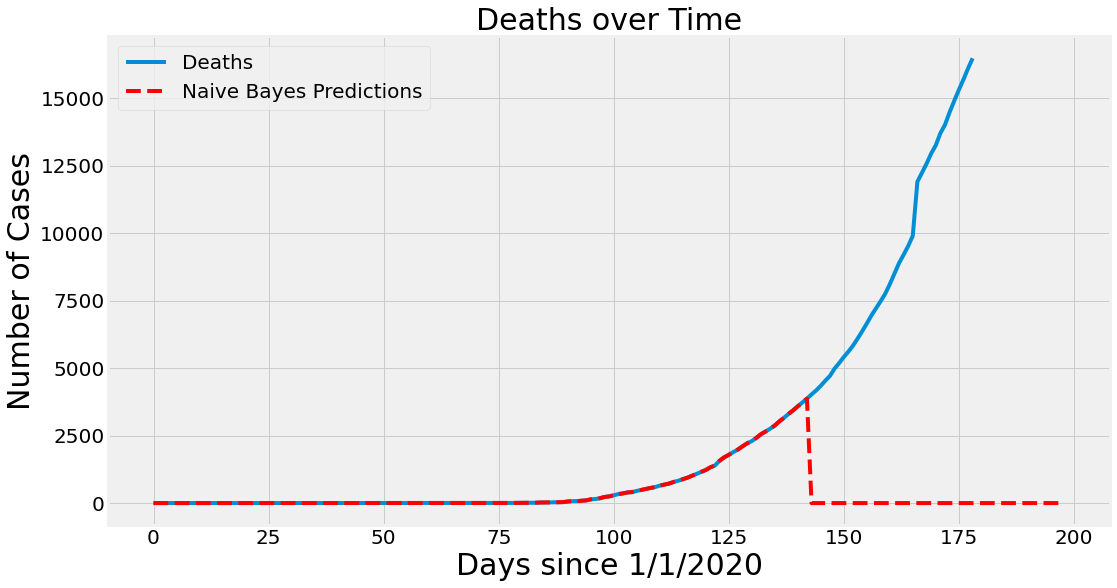

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_deaths)
plt.plot(future_forecast,nb_pred,linestyle='dashed',color='red')
plt.title('Deaths over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Deaths','Naive Bayes Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# ***Recovered***

In [ ]:
X_train_recovered,X_test_recovered,Y_train_recovered,Y_test_recovered=train_test_split(X,Y_recovered,test_size=0.2,shuffle=False)

In [ ]:
nb_recovered=GaussianNB()
nb_recovered.fit(X_train_recovered,Y_train_recovered)
nb_pred=nb_recovered.predict(future_forecast)

Root mean square error 178976.9552711714
Root mean absolute error 401.9408815015241


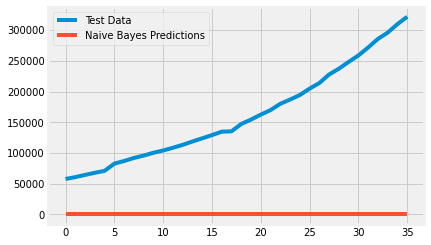

In [ ]:
nb_test_pred=nb_recovered.predict(X_test_recovered)
plt.plot(Y_test_recovered)
plt.plot(nb_test_pred)
plt.legend(['Test Data','Naive Bayes Predictions'])
mse = math.sqrt(mean_squared_error(nb_test_pred, Y_test_recovered)) 
print('Root mean square error', mse) 
mae = math.sqrt(mean_absolute_error(nb_test_pred, Y_test_recovered)) 
print('Root mean absolute error', mae) 

In [ ]:
nb_df=pd.DataFrame({'Date':future_forecast_dates[-20:],'Naive Bayes Predicted # number of Recovered cases in India':np.round(nb_pred[-20:])})
nb_df

,Date,Naive Bayes Predicted # number of Recovered cases in India
0,2020-06-28,0
1,2020-06-29,0
2,2020-06-30,0
3,2020-07-01,0
4,2020-07-02,0
5,2020-07-03,0
6,2020-07-04,0
7,2020-07-05,0
8,2020-07-06,0
9,2020-07-07,0


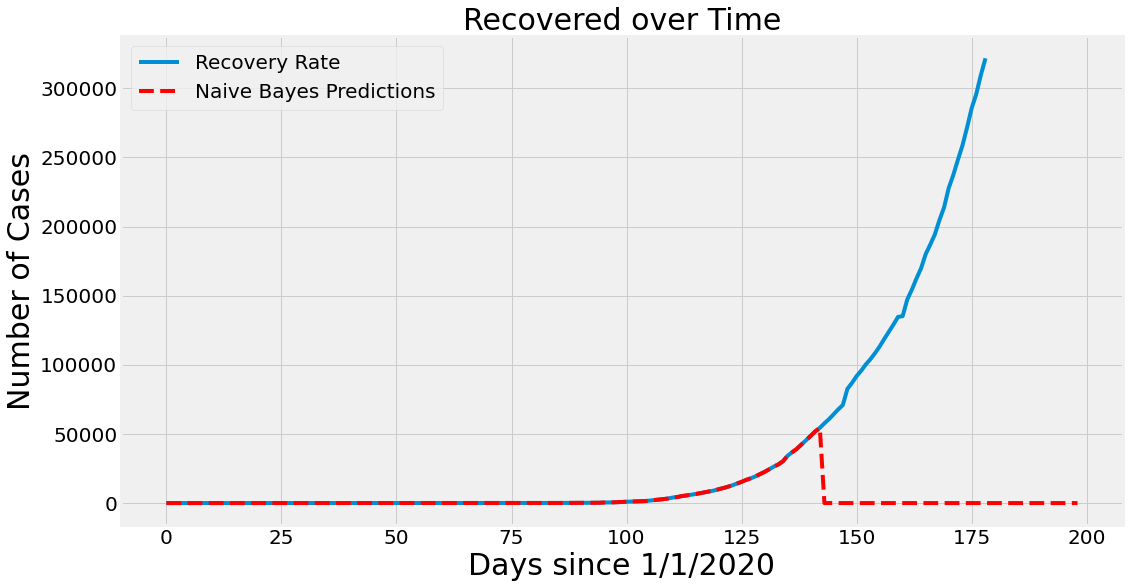

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,Y_recovered)
plt.plot(future_forecast,nb_pred,linestyle='dashed',color='red')
plt.title('Recovered over Time',size=30)
plt.xlabel('Days since 1/1/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Recovery Rate','Naive Bayes Predictions'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()